In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("email.csv")

In [3]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
data.drop(["Unnamed: 0"], axis =1)

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [7]:
data.drop(["label_num","Unnamed: 0"], axis =1, inplace =True)

In [8]:
data.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [9]:
data.drop_duplicates()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5165,ham,"Subject: fw : crosstex energy , driscoll ranch..."
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5169,ham,Subject: industrial worksheets for august 2000...


In [10]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [12]:
count = data["label"].value_counts()

In [13]:
count

ham     3672
spam    1499
Name: label, dtype: int64

In [15]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x2bc019f3e90>,
 [Text(-0.6745093333607546, 0.8689287423081543, 'ham'),
  Text(0.6745094147157317, -0.868928679156029, 'spam')])

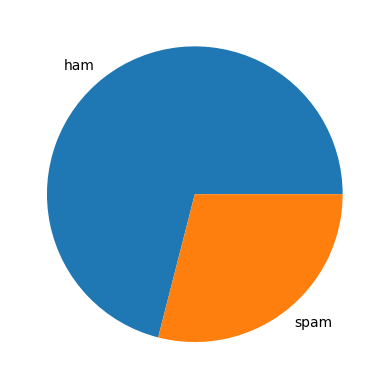

In [16]:
plt.pie(count, labels = count.index)

In [17]:
import nltk
from nltk.corpus import stopwords
import string

In [18]:
def process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean

In [19]:
data["text"].apply(process)

0       [Subject, enron, methanol, meter, 988291, foll...
1       [Subject, hpl, nom, january, 9, 2001, see, att...
2       [Subject, neon, retreat, ho, ho, ho, around, w...
3       [Subject, photoshop, windows, office, cheap, m...
4       [Subject, indian, springs, deal, book, teco, p...
                              ...                        
5166    [Subject, put, 10, ft, transport, volumes, dec...
5167    [Subject, 3, 4, 2000, following, noms, hpl, ta...
5168    [Subject, calpine, daily, gas, nomination, jul...
5169    [Subject, industrial, worksheets, august, 2000...
5170    [Subject, important, online, banking, alert, d...
Name: text, Length: 5171, dtype: object

In [20]:
data["text"].head()

0    Subject: enron methanol ; meter # : 988291\r\n...
1    Subject: hpl nom for january 9 , 2001\r\n( see...
2    Subject: neon retreat\r\nho ho ho , we ' re ar...
3    Subject: photoshop , windows , office . cheap ...
4    Subject: re : indian springs\r\nthis deal is t...
Name: text, dtype: object

In [25]:
from sklearn.feature_extraction.text import CountVectorizer as cv

In [27]:
import numpy as np

In [28]:
x = np.array(data["text"])
y = np.array(data["label"])

In [29]:
cv = cv()

In [30]:
X = cv.fit_transform(x)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.2 , random_state = 0)

In [34]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))
print()
print("Confusion Matrix: \n", confusion_matrix(y_train, pred))
print("Accuracy: \n", accuracy_score(y_train, pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      2940
        spam       0.98      0.97      0.98      1196

    accuracy                           0.99      4136
   macro avg       0.99      0.98      0.98      4136
weighted avg       0.99      0.99      0.99      4136


Confusion Matrix: 
 [[2920   20]
 [  33 1163]]
Accuracy: 
 0.9871856866537717


In [39]:
pred1 = classifier.predict(X_test)
print(classification_report(y_test, pred1))
print()
print("Confusion Matrix: \n", confusion_matrix(y_test, pred1))
print("Accuracy: \n", accuracy_score(y_test, pred1))

              precision    recall  f1-score   support

         ham       0.98      0.98      0.98       732
        spam       0.96      0.96      0.96       303

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035


Confusion Matrix: 
 [[721  11]
 [ 13 290]]
Accuracy: 
 0.9768115942028985


In [40]:
sample= "my late grandfather has 200000 dollar in his account please take care of it"
ex = cv.transform([sample]).toarray()
classifier.predict(ex)

array(['spam'], dtype='<U4')